In [195]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats

In [43]:
path = '../data/weatherdata'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

weather_df = pd.concat(li, axis=0, ignore_index=True)

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (43,44,48,53,57,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (45,46,50,55,59,88,90) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (42,43,44,45,56,57,64,90) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (42,43,44,45,49,54,58,59) have mi

In [9]:
rides = pd.read_csv('../data/riders_cleaned.csv.gz', usecols = ['starttime', 'tripduration', 'gender', 'season', 'dayofweek','usertype','birth year'])

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
pd.set_option('display.max_columns', None)

In [40]:
weather_df

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,CIG,VIS,TMP,DEW,SLP,AA1,AA2,AA3,AB1,AD1,AE1,AH1,AH2,AH3,AH4,AH5,AH6,AI1,AI2,AI3,AI4,AI5,AI6,AJ1,AK1,AL1,AM1,AN1,AT1,AT2,AT3,AT4,AT5,AT6,AU1,AU2,AU3,AU4,AW1,AW2,AW3,AW4,AW5,AX1,AX2,AX3,AX4,AX5,ED1,GA1,GA2,GA3,GD1,GD2,GD3,GD4,GE1,GF1,KA1,KA2,KB1,KB2,KB3,KC1,KC2,KD1,KD2,KE1,KG1,KG2,MA1,MD1,MF1,MG1,MH1,MK1,MV1,MW1,OC1,OD1,OE1,OE2,OE3,RH1,RH2,RH3,REM,EQD,AT7,AT8,MW2,GA4,GA5,GA6,MW3
0,72503014732,2017-01-01T00:00:00,4,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US",FM-12,99999,V020,"200,1,N,0077,1","99999,9,9,N","016000,1,9,9","+0067,1","-0028,1","10143,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99,9,+02250,1,99,9",NaN,NaN,NaN,NaN,NaN,NaN,"9,AGL ,+99999,+99999","08,99,1,99,9,99,9,02250,1,99,9,99,9","120,M,+0072,1","120,N,+0011,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99999,9,10132,1","6,1,007,1,+999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,99,0113,1,999",NaN,NaN,NaN,NaN,NaN,NaN,SYN08672503 32866 82015 10067 21028 30132 4014...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72503014732,2017-01-01T00:51:00,7,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US",FM-15,KLGA,V030,"220,5,N,0051,5","02743,5,M,N","016093,5,N,5","+0067,5","-0039,5","10139,5","01,0000,9,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"02,5,+02286,5,99,9","08,5,+02743,5,99,9",NaN,"1,99,1,+02286,5,9","4,99,1,+02743,5,9",NaN,NaN,"9,AGL ,+99999,+99999","99,99,9,99,9,99,9,02286,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10139,5,10128,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0103,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET11112/31/16 19:51:03 METAR KLGA 010051Z 220...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72503014732,2017-01-01T01:51:00,7,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US",FM-15,KLGA,V030,"210,5,N,0051,5","03048,5,M,N","016093,5,N,5","+0067,5","-0044,5","10131,5","01,0000,9,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"08,5,+03048,5,99,9",NaN,NaN,"4,99,1,+03048,5,9",NaN,NaN,NaN,"9,AGL ,+99999,+99999","99,99,9,99,9,99,9,03048,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10132,5,10121,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0093,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10412/31/16 20:51:03 METAR KLGA 010151Z 210...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72503014732,2017-01-01T02:51:00,7,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US",FM-15,KLGA,V030,"200,5,N,0051,5","02591,5,M,N","016093,5,N,5","+0067,5","-0044,5","10128,5","01,0000,9,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"08,5,+02591,5,99,9",NaN,NaN,"4,99,1,+02591,5,9",NaN,NaN,NaN,"9,AGL ,+99999,+99999","99,99,9,99,9,99,9,02591,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10129,5,10118,5","6,9,015,9,+999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10712/31/16 21:51:03 METAR KLGA 010251Z 200...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72503014732,2017-01-01T03:00:00,4,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US",FM-12,99999,V020,"200,1,N,0051,1","99999,9,9,N","016000,1,9,9","+0067,1","-0044,1","10128,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,AGL ,+99999,+99999","08,99,1,99,9,99,9,99999,9,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99999,9,10115,1","6,1,015,1,+999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYN06472503 32966 82010 10067 21044 30115 4012...,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
def to_milesperhour(num):
    """A function to convert wind speed from meters/second to miles/hour. The conversion is done by using the 
    above formula
    """
    convert = (num * 3600)/(1000 * 1.6)
    return convert

In [45]:
def clean_weatherdata(df):
    """This function will clean the weather data from any given year or years (the merged weather data)
    Weather data was obtained from NOAA( National Cceanic and Atmospheric Administration ) 
    https://www.ncei.noaa.gov/data/global-hourly/archive/csv/.
    Additional websites were also used as references in order to interpret the numbers from the data and to
    engineer new features such as windy and rainy. The column windy and its values (breeze, gale, force...)
    were all based on information from NOAA https://www.weather.gov/pqr/wind. 
    https://www.visualcrossing.com/resources/documentation/weather-data/how-we-process-integrated-surface-database-historical-weather-data/
    was used to interpret the numbers of the data.
    """
    # Make a copy
    nyweather= df.copy()
    
    # Select the columns that will be used
    nyweather = nyweather[['DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'WND', 'TMP',
             'DEW', 'SLP', 'AA1','AA2']]
    
    # Clean DATE column
    nyweather['DATE'] = nyweather['DATE'].str.replace('T', ' ')
    
    # Clean TMP (temperature) column. Please refer to 
    # Interpreting the numbers are based on 
    #https://www.visualcrossing.com/resources/documentation/weather-data/how-we-process-integrated-surface-database-historical-weather-data/

    nyweather['TMP'] = nyweather['TMP'].astype(str)
    nyweather['TMP'] = nyweather['TMP'].str.slice(0, -2)
    nyweather['TMP'] = nyweather['TMP'].str.replace('+','')
    nyweather = nyweather.drop(nyweather[nyweather.TMP == '9999'].index)
    nyweather['TMP'] = nyweather['TMP'].astype(int)
    nyweather['TMP'] = nyweather['TMP']/10
    print('complete part 1')
    
    # Clean WND column
    # Please refer to https://www.weather.gov/pqr/wind
    nyweather['WND'] = nyweather['WND'].astype(str)
    nyweather = pd.concat([nyweather, nyweather.WND.str.split(',', expand = True)],1)
    nyweather = nyweather.rename(columns={3:'wind_speed'})
    nyweather['wind_speed'] = nyweather['wind_speed'].astype(int)
    nyweather['wind_speed'] = nyweather['wind_speed']/10
    nyweather['wind_speed'] = nyweather['wind_speed'].map(to_milesperhour)
    
    # Engineered a new feature called windy
    nyweather['windy'] = nyweather['wind_speed'].apply(lambda x: 'calm' if x < 4 else 'breeze' if x < 12 else \
                                        'moderate breeze' if x < 24 else 'strong breeze' if x < 31 else \
                                        'gale' if x < 63 else 'storm force')
    nyweather = nyweather[['DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'WND', 'TMP',\
                           'DEW', 'SLP', 'AA1','AA2', 'wind_speed', 'windy']]
    
    print('complete part 2')
    
    # Clean the AA1 column that has precipitation information
    nyweather['AA1'] = nyweather['AA1'].fillna('0,0,0,0')
    nyweather['AA1'] = nyweather['AA1'].astype(str)
    nyweather = pd.concat([nyweather, nyweather.AA1.str.split(',', expand = True)],1)
    nyweather = nyweather.rename(columns={1:'precipitation'})
    nyweather['precipitation'] = nyweather['precipitation'].astype(int)
    nyweather['precipitation'] = nyweather['precipitation']/10
    nyweather = nyweather[['DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'WND', 'TMP',\
                           'DEW', 'SLP', 'wind_speed', 'windy', 'precipitation']]
    
    # Engineered a new feature called rainy
    nyweather['rainy'] = nyweather['precipitation'].apply(lambda x: 'rainy' if x > 0 else 'not rainy')
    
    
    # Clean DATE column
    # Generate new features - month, date, hour and month2
    nyweather['DATE'] = nyweather['DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    nyweather['month'] = nyweather.DATE.dt.month
    nyweather['date'] = nyweather.DATE.dt.date
    nyweather['hour'] = nyweather.DATE.dt.hour
    nyweather['month2'] = nyweather.DATE.dt.month.apply(lambda x: 'Jan' if x == 1 else 'Feb' if x == 2 else \
    'Mar' if x == 3 else 'Apr' if x == 4 else 'May' if x == 5 else 'Jun' if x == 6 else 'Jul' if x == 7 else \
    'Aug' if x == 8 else 'Sep' if x == 9 else 'Oct' if x == 10 else 'Nov' if x == 11 else 'Dec' )
    
    # Generate cleaned dataframe
    return nyweather

In [46]:
weather_df = clean_weatherdata(weather_df)

complete part 1
complete part 2


In [47]:
weather_df

,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,WND,TMP,DEW,SLP,wind_speed,windy,precipitation,rainy,month,date,hour,month2
0,2017-01-01 00:00:00,4,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US","200,1,N,0077,1",6.7,"-0028,1","10143,1",17.325,moderate breeze,0.0,not rainy,1,2017-01-01,0,Jan
1,2017-01-01 00:51:00,7,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US","220,5,N,0051,5",6.7,"-0039,5","10139,5",11.475,breeze,0.0,not rainy,1,2017-01-01,0,Jan
2,2017-01-01 01:51:00,7,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US","210,5,N,0051,5",6.7,"-0044,5","10131,5",11.475,breeze,0.0,not rainy,1,2017-01-01,1,Jan
3,2017-01-01 02:51:00,7,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US","200,5,N,0051,5",6.7,"-0044,5","10128,5",11.475,breeze,0.0,not rainy,1,2017-01-01,2,Jan
4,2017-01-01 03:00:00,4,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US","200,1,N,0051,1",6.7,"-0044,1","10128,1",11.475,breeze,0.0,not rainy,1,2017-01-01,3,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109768,2019-12-31 20:51:00,7,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US","240,5,N,0046,5",7.2,"+0011,5","10028,5",10.350,breeze,0.0,not rainy,12,2019-12-31,20,Dec
109769,2019-12-31 21:00:00,4,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US","240,1,N,0046,1",7.2,"+0011,1","10028,1",10.350,breeze,0.0,not rainy,12,2019-12-31,21,Dec
109770,2019-12-31 21:51:00,7,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US","250,5,N,0062,5",7.2,"+0000,5","10033,5",13.950,moderate breeze,0.0,not rainy,12,2019-12-31,21,Dec
109771,2019-12-31 22:51:00,7,40.77944,-73.88035,3.4,"LAGUARDIA AIRPORT, NY US","240,5,N,0046,5",7.2,"+0006,5","10036,5",10.350,breeze,0.0,not rainy,12,2019-12-31,22,Dec


In [11]:
daily = weather_df.groupby(['date'])[['precipitation','wind_speed']].\
mean().rename(columns={'precipitation':'avg_precip', 'wind_speed': 'avg_wind_speed'}).reset_index()

In [12]:
daily

,date,avg_precip,avg_wind_speed
0,2013-01-01,0.000000,143.042143
1,2013-01-02,0.000000,82.281818
2,2013-01-03,0.000000,79.165909
3,2013-01-04,0.000000,85.352344
4,2013-01-05,0.000000,79.275000
...,...,...,...
2896,2020-12-06,1.072727,89.461364
2897,2020-12-07,0.000000,78.906818
2898,2020-12-08,0.000000,77.997857
2899,2020-12-09,0.032432,73.380405


In [62]:
daily_temp = weather_df.groupby(['date'])[['TMP']].agg(['min', 'max', 'mean']).reset_index()
daily_temp.columns = ["_".join(x) for x in daily_temp.columns.ravel()]

In [63]:
daily_temp

,date_,TMP_min,TMP_max,TMP_mean
0,2013-01-01,1.1,5.0,4.075758
1,2013-01-02,-4.4,1.1,-1.800000
2,2013-01-03,-3.3,0.6,-1.268750
3,2013-01-04,0.0,3.3,1.709677
4,2013-01-05,1.1,6.1,3.153125
...,...,...,...,...
2896,2020-12-06,3.3,6.7,4.759375
2897,2020-12-07,1.1,5.6,2.987500
2898,2020-12-08,0.0,4.4,1.508824
2899,2020-12-09,1.1,3.9,2.358333


In [66]:
daily_temp = weather_df.groupby(["date"]).agg({
  "TMP" : ['min', 'max', 'mean'], 
  "wind_speed" : ["min", 'max', 'mean'], 
  "precipitation" : ["sum"]
  }).reset_index()
daily_temp.columns = ["_".join(x) for x in daily_temp.columns.ravel()]


In [68]:
daily_temp.to_csv("../data/final_weather.csv", index = False)    

In [67]:
daily_temp

,date_,TMP_min,TMP_max,TMP_mean,wind_speed_min,wind_speed_max,wind_speed_mean,precipitation_sum
0,2013-01-01,1.1,5.0,4.075758,9.225,18.450,15.361364,0.0
1,2013-01-02,-4.4,1.1,-1.800000,6.975,24.300,14.547656,0.0
2,2013-01-03,-3.3,0.6,-1.268750,5.850,15.075,11.334375,0.0
3,2013-01-04,0.0,3.3,1.709677,10.350,19.800,15.532258,0.0
4,2013-01-05,1.1,6.1,3.153125,0.000,18.450,11.446875,0.0
...,...,...,...,...,...,...,...,...
2896,2020-12-06,3.3,6.7,4.759375,12.825,27.900,21.951562,9.7
2897,2020-12-07,1.1,5.6,2.987500,5.850,20.925,11.067188,0.0
2898,2020-12-08,0.0,4.4,1.508824,9.225,18.450,14.122059,0.0
2899,2020-12-09,1.1,3.9,2.358333,5.850,19.800,12.925000,1.2


In [ ]:
daily_temp = weather_df.groupby(['date'])[['TMP']].agg(['min', 'max', 'mean']).reset_index()
daily_temp.columns = ["_".join(x) for x in daily_temp.columns.ravel()]

In [23]:
rides.head(5)

,tripduration,starttime,usertype,birth year,gender,season,dayofweek
0,362,2017-09-01 00:00:17,Subscriber,1993,1,fall,Friday
1,188,2017-09-01 00:00:21,Subscriber,1988,1,fall,Friday
2,305,2017-09-01 00:00:25,Subscriber,1969,1,fall,Friday
3,223,2017-09-01 00:00:52,Subscriber,1993,1,fall,Friday
4,758,2017-09-01 00:01:01,Subscriber,1987,1,fall,Friday


In [24]:
rides['starttime'] = pd.to_datetime(rides['starttime'])
rides['date'] = rides['starttime'].dt.strftime('%Y-%m-%d')
rides['date'] = pd.to_datetime(rides['date'])
rides['month'] = rides['date'].dt.strftime('%Y-%m')
rides['year'] = rides['date'].dt.strftime('%Y')

In [ ]:
rides['hour'] = rides['date'].dt.strftime('%H')

In [69]:
rides.head(5)

,tripduration,starttime,usertype,birth year,gender,season,dayofweek,date,month,year
0,362,2017-09-01 00:00:17,Subscriber,1993,1,fall,Friday,2017-09-01,2017-09,2017
1,188,2017-09-01 00:00:21,Subscriber,1988,1,fall,Friday,2017-09-01,2017-09,2017
2,305,2017-09-01 00:00:25,Subscriber,1969,1,fall,Friday,2017-09-01,2017-09,2017
3,223,2017-09-01 00:00:52,Subscriber,1993,1,fall,Friday,2017-09-01,2017-09,2017
4,758,2017-09-01 00:01:01,Subscriber,1987,1,fall,Friday,2017-09-01,2017-09,2017


In [70]:
daily_rides = rides.groupby(['date'])[['date']].count().rename(columns={'date':'counts'}).reset_index()

In [76]:
daily_rides

,date,counts
0,2013-06-01,8398
1,2013-06-02,15430
2,2013-06-03,7325
3,2013-06-04,15228
4,2013-06-05,15173
...,...,...
2727,2020-11-26,30687
2728,2020-11-27,53108
2729,2020-11-28,53202
2730,2020-11-29,52557


In [90]:
daily_rides['date'] = daily_rides['date'].astype(str)
daily_temp['date'] = daily_temp['date'].astype(str)

In [91]:
daily_temp.dtypes

date_                 object
TMP_min              float64
TMP_max              float64
TMP_mean             float64
wind_speed_min       float64
wind_speed_max       float64
wind_speed_mean      float64
precipitation_sum    float64
date                  object
dtype: object

In [92]:
daily_rides.dtypes

date      object
counts     int64
dtype: object

In [105]:
combined = daily_rides.merge(daily_temp, on = 'date', how = 'inner')

In [107]:
combined = combined[['date', 'TMP_min', 'TMP_max', 'TMP_mean', 'wind_speed_min', 'wind_speed_max', \
         'wind_speed_mean', 'precipitation_sum', 'counts']]

In [110]:
combined['date'] = pd.to_datetime(combined['date'])

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
combined

,date,TMP_min,TMP_max,TMP_mean,wind_speed_min,wind_speed_max,wind_speed_mean,precipitation_sum,counts,windy,rainy
0,2013-06-01,24.4,31.7,28.065625,8.100,13.950,10.610156,0.0,8398,breeze,not rainy
1,2013-06-02,21.1,30.6,26.425000,8.100,18.450,11.601562,0.0,15430,breeze,not rainy
2,2013-06-03,21.0,28.9,22.721053,0.000,15.075,8.301316,86.8,7325,breeze,rainy
3,2013-06-04,15.0,23.9,19.781250,0.000,17.325,10.919531,39.6,15228,breeze,rainy
4,2013-06-05,15.0,22.8,19.487500,0.000,13.950,8.191406,0.0,15173,breeze,not rainy
...,...,...,...,...,...,...,...,...,...,...,...
2727,2020-11-26,11.7,19.0,15.260526,3.375,15.075,8.591447,56.4,30687,breeze,rainy
2728,2020-11-27,11.7,17.2,14.900000,0.000,11.475,4.870161,5.3,53108,breeze,rainy
2729,2020-11-28,10.0,14.4,12.025000,0.000,16.200,8.613281,0.0,53202,breeze,not rainy
2730,2020-11-29,5.6,13.3,9.484375,0.000,13.950,6.848437,0.0,52557,breeze,not rainy


Text(0, 0.5, 'Daily Number of Rides')

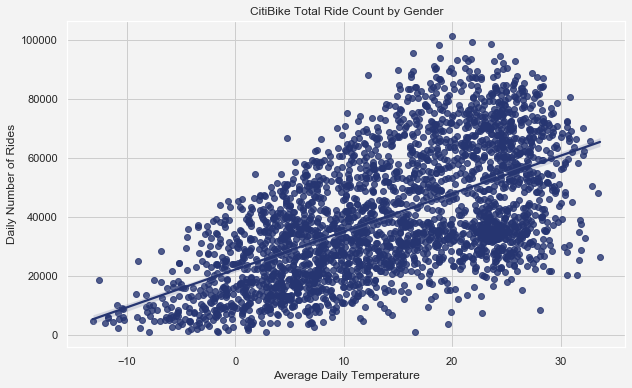

In [119]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571", "#263571", "#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (10,6))
fig = sns.regplot(x = 'TMP_mean', y = 'counts', data = combined)
fig.set_title('CitiBike Total Ride Count by Gender', fontsize=12)
fig.set_xlabel('Average Daily Temperature', fontsize=12)
fig.set_ylabel('Daily Number of Rides', fontsize=12)

Text(0, 0.5, 'Daily Number of Rides')

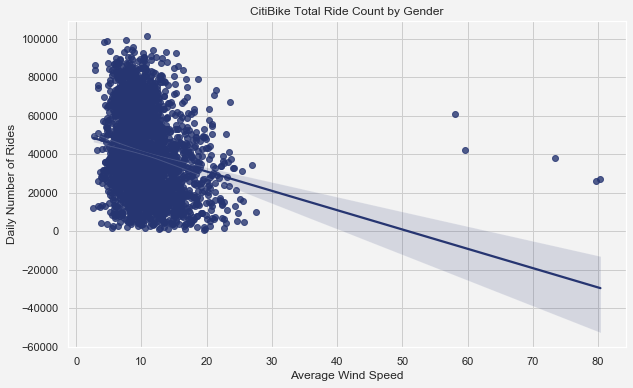

In [124]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571", "#263571", "#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (10,6))
fig = sns.regplot(x = 'wind_speed_mean', y = 'counts', data = combined)
fig.set_title('CitiBike Total Ride Count by Gender', fontsize=12)
fig.set_xlabel('Average Wind Speed', fontsize=12)
fig.set_ylabel('Daily Number of Rides', fontsize=12)

In [197]:
z_scores = stats.zscore(combined['wind_speed_mean'])

In [199]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [201]:
nonOutlierList = Remove_Outlier_Indices(combined['wind_speed_mean'])

In [204]:
dfSubset = combined[nonOutlierList]

In [205]:
dfSubset

,date,TMP_min,TMP_max,TMP_mean,wind_speed_min,wind_speed_max,wind_speed_mean,precipitation_sum,counts,windy,rainy,precipitation_sum_nonzero,log_precipitation_sum
0,2013-06-01,24.4,31.7,28.065625,8.100,13.950,10.610156,0.0,8398,calm,not rainy,0.0001,-9.210340
1,2013-06-02,21.1,30.6,26.425000,8.100,18.450,11.601562,0.0,15430,calm,not rainy,0.0001,-9.210340
2,2013-06-03,21.0,28.9,22.721053,0.000,15.075,8.301316,86.8,7325,calm,rainy,86.8000,4.463607
3,2013-06-04,15.0,23.9,19.781250,0.000,17.325,10.919531,39.6,15228,calm,rainy,39.6000,3.678829
4,2013-06-05,15.0,22.8,19.487500,0.000,13.950,8.191406,0.0,15173,calm,not rainy,0.0001,-9.210340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,2020-11-26,11.7,19.0,15.260526,3.375,15.075,8.591447,56.4,30687,calm,rainy,56.4000,4.032469
2728,2020-11-27,11.7,17.2,14.900000,0.000,11.475,4.870161,5.3,53108,calm,rainy,5.3000,1.667707
2729,2020-11-28,10.0,14.4,12.025000,0.000,16.200,8.613281,0.0,53202,calm,not rainy,0.0001,-9.210340
2730,2020-11-29,5.6,13.3,9.484375,0.000,13.950,6.848437,0.0,52557,calm,not rainy,0.0001,-9.210340


Text(0, 0.5, 'Daily Number of Rides')

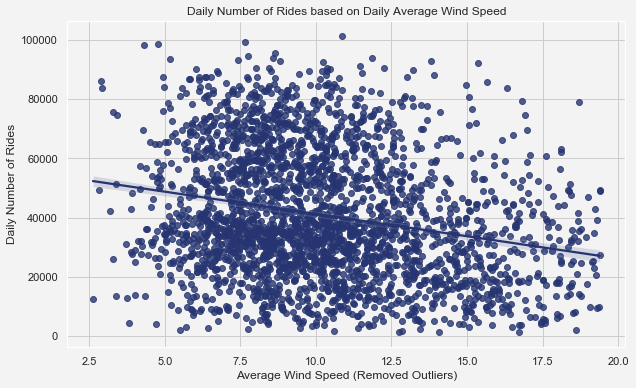

In [207]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571", "#263571", "#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (10,6))
fig = sns.regplot(x = 'wind_speed_mean', y = 'counts', data = dfSubset)
fig.set_title('Daily Number of Rides based on Daily Average Wind Speed', fontsize=12)
fig.set_xlabel('Average Wind Speed (Removed Outliers)', fontsize=12)
fig.set_ylabel('Daily Number of Rides', fontsize=12)

In [185]:
combined['precipitation_sum_nonzero'] = combined['precipitation_sum']

In [186]:
combined.loc[(combined.precipitation_sum_nonzero == 0),'precipitation_sum_nonzero']=0.0001

In [187]:
combined['log_precipitation_sum'] = np.log(combined['precipitation_sum_nonzero'])

Text(0, 0.5, 'Daily Number of Rides')

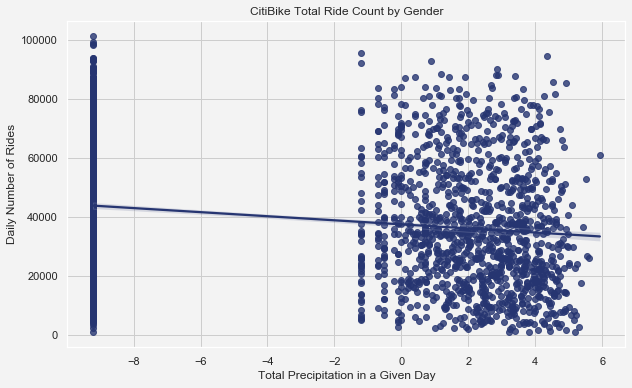

In [188]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571", "#263571", "#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (10,6))
fig = sns.regplot(x = 'log_precipitation_sum', y = 'counts', data = combined)
fig.set_title('CitiBike Total Ride Count by Gender', fontsize=12)
fig.set_xlabel('Total Precipitation in a Given Day', fontsize=12)
fig.set_ylabel('Daily Number of Rides', fontsize=12)

In [149]:
combined['windy'] = combined['wind_speed_mean'].apply(lambda x: 'calm' if x < 15 else 'windy')

In [127]:
combined['rainy'] = combined['precipitation_sum'].apply(lambda x: 'rainy' if x > 0 else 'not rainy')

Text(0, 0.5, 'Daily Number of Rides')

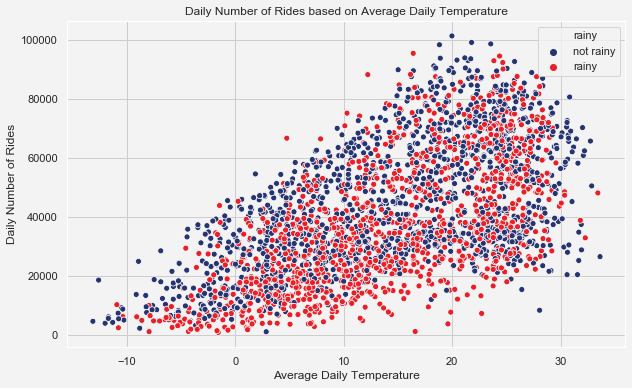

In [208]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571", "#ea2029", "#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (10,6))
fig = sns.scatterplot(x = 'TMP_mean', y = 'counts', hue = 'rainy', data = combined)
fig.set_title('Daily Number of Rides based on Average Daily Temperature', fontsize=12)
fig.set_xlabel('Average Daily Temperature', fontsize=12)
fig.set_ylabel('Daily Number of Rides', fontsize=12)

Text(0, 0.5, 'Daily Number of Rides')

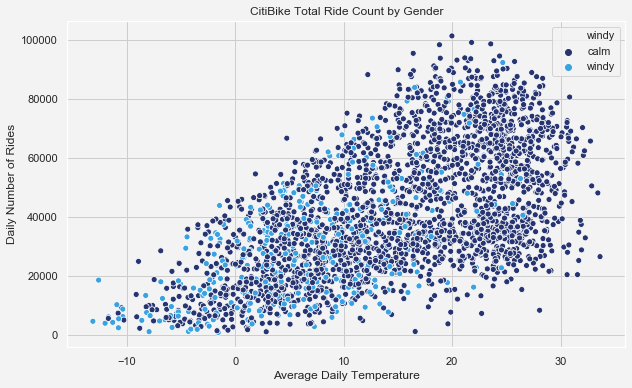

In [150]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571","#39a2e1","#343335","#7a6155","#574746","#60645f","#8e8c8e","#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (10,6))
fig = sns.scatterplot(x = 'TMP_mean', y = 'counts', hue = 'windy', data = combined)
fig.set_title('CitiBike Total Ride Count by Gender', fontsize=12)
fig.set_xlabel('Average Daily Temperature', fontsize=12)
fig.set_ylabel('Daily Number of Rides', fontsize=12)

TypeError: cannot unpack non-iterable AxesSubplot object

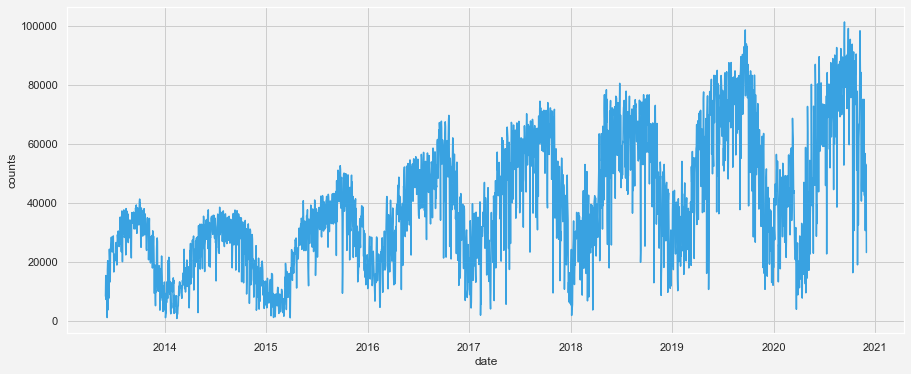

In [157]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#39a2e1","#263571","#343335","#7a6155","#574746","#60645f","#8e8c8e","#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (15,6))
fig, ax1 = sns.lineplot(x = 'date', y = 'counts', data = combined, color = '#39a2e1')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'date', y = 'TMP_mean', data = combined, color = '#263571', sort = False)
plt.show()

In [ ]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
fig, ax1 = plt.subplots(figsize=(14,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('Price and Rental Price Rate by Category', fontsize=12)
ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1 = sns.barplot(x='category', y='price', data = cat_df, color = '#c64242')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
ax2.set_ylabel('Rental Price Rate', fontsize=12)
ax2 = sns.lineplot(x='category', y='rental_price_rate', data = cat_df, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

Text(0, 0.5, 'Number of Counts (Dark Blue)')

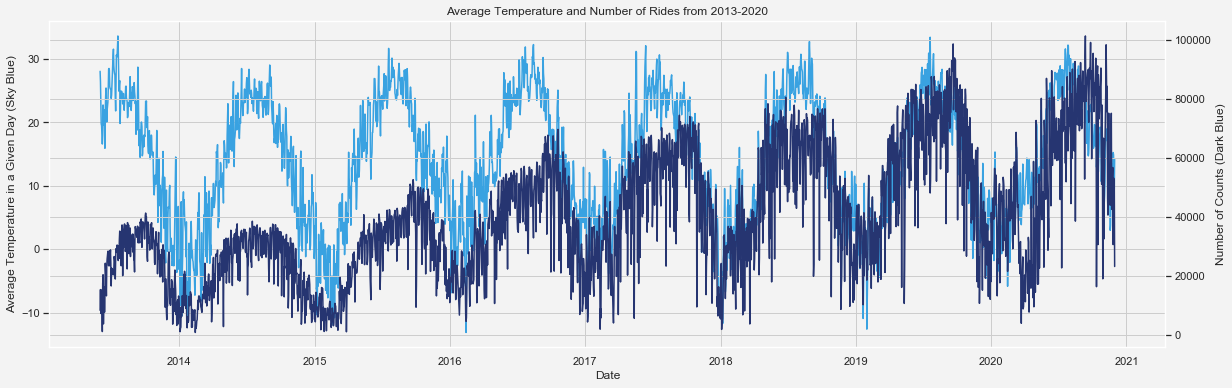

In [168]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()
sns.lineplot(x = 'date', y = 'TMP_mean', color = '#39a2e1', data = combined, ax = ax1)
sns.lineplot(x = 'date', y = 'counts', color = '#263571', data = combined, ax = ax2)
ax1.set_title('Average Temperature and Number of Rides from 2013-2020', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Average Temperature in a Given Day (Sky Blue)', fontsize=12)
ax2.set_ylabel('Number of Counts (Dark Blue)')

,TMP_min,TMP_max,TMP_mean,wind_speed_min,wind_speed_max,wind_speed_mean,precipitation_sum,counts,windy,rainy,precipitation_sum_nonzero,log_precipitation_sum
date,,,,,,,,,,,,
2013-06-01,24.4,31.7,28.065625,8.100,13.950,10.610156,0.0,8398,calm,not rainy,0.0001,-9.210340
2013-06-02,21.1,30.6,26.425000,8.100,18.450,11.601562,0.0,15430,calm,not rainy,0.0001,-9.210340
2013-06-03,21.0,28.9,22.721053,0.000,15.075,8.301316,86.8,7325,calm,rainy,86.8000,4.463607
2013-06-04,15.0,23.9,19.781250,0.000,17.325,10.919531,39.6,15228,calm,rainy,39.6000,3.678829
2013-06-05,15.0,22.8,19.487500,0.000,13.950,8.191406,0.0,15173,calm,not rainy,0.0001,-9.210340
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,11.7,19.0,15.260526,3.375,15.075,8.591447,56.4,30687,calm,rainy,56.4000,4.032469
2020-11-27,11.7,17.2,14.900000,0.000,11.475,4.870161,5.3,53108,calm,rainy,5.3000,1.667707
2020-11-28,10.0,14.4,12.025000,0.000,16.200,8.613281,0.0,53202,calm,not rainy,0.0001,-9.210340


In [216]:
combined_2019 = combined.loc['2019-01-01':'2019-12-31']

In [218]:
combined_2019.reset_index()

,date,TMP_min,TMP_max,TMP_mean,wind_speed_min,wind_speed_max,wind_speed_mean,precipitation_sum,counts,windy,rainy,precipitation_sum_nonzero,log_precipitation_sum
0,2019-01-01,6.7,15.6,10.246939,0.000,27.900,14.730612,105.9,21962,calm,rainy,105.9000,4.662495
1,2019-01-02,1.7,6.7,3.640625,3.375,17.325,9.682031,0.0,37797,calm,not rainy,0.0001,-9.210340
2,2019-01-03,2.8,7.2,5.372973,0.000,20.925,10.739189,0.0,41676,calm,not rainy,0.0001,-9.210340
3,2019-01-04,2.8,8.3,5.021875,5.850,17.325,10.307812,0.0,43922,calm,not rainy,0.0001,-9.210340
4,2019-01-05,5.6,8.3,6.761111,3.375,20.925,13.058333,30.2,17432,calm,rainy,30.2000,3.407842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,6.1,12.2,9.356757,4.725,13.950,8.489189,0.0,31808,calm,not rainy,0.0001,-9.210340
361,2019-12-28,7.0,11.7,9.039394,0.000,13.950,8.427273,0.0,28520,calm,not rainy,0.0001,-9.210340
362,2019-12-29,4.4,8.3,5.615625,0.000,11.475,7.502344,2.1,17968,calm,rainy,2.1000,0.741937
363,2019-12-30,3.9,6.1,4.867213,8.100,30.150,16.926639,53.6,12138,windy,rainy,53.6000,3.981549


In [221]:
daily_temp2 = weather_df.groupby(["date","hour"]).agg({
  "TMP" : ['min', 'max', 'mean'], 
  "wind_speed" : ["min", 'max', 'mean'], 
  "precipitation" : ["sum"]
  }).reset_index()
daily_temp2.columns = ["_".join(x) for x in daily_temp2.columns.ravel()]


In [222]:
daily_temp2

,date_,hour_,TMP_min,TMP_max,TMP_mean,wind_speed_min,wind_speed_max,wind_speed_mean,precipitation_sum
0,2013-01-01,0,3.3,3.9,3.6,13.950,17.325,15.6375,0.0
1,2013-01-01,1,3.9,3.9,3.9,13.950,13.950,13.9500,0.0
2,2013-01-01,2,4.4,4.4,4.4,15.075,15.075,15.0750,0.0
3,2013-01-01,3,4.4,4.4,4.4,15.075,16.200,15.6375,0.0
4,2013-01-01,4,5.0,5.0,5.0,18.450,18.450,18.4500,0.0
...,...,...,...,...,...,...,...,...,...
69602,2020-12-10,3,3.9,3.9,3.9,13.950,13.950,13.9500,0.0
69603,2020-12-10,4,4.4,4.4,4.4,10.350,10.350,10.3500,0.0
69604,2020-12-10,5,3.9,3.9,3.9,8.100,8.100,8.1000,0.0
69605,2020-12-10,6,4.4,4.4,4.4,10.350,10.350,10.3500,0.0


In [ ]:
daily_rides2 = rides.groupby(['date','hour'])[['hour']].count().rename(columns={'hour': 'counts'}).reset_index()

In [ ]:
combined_hourly = daily_rides2.merge(daily_temp2, on = ['date', 'hour'], how = 'inner')

In [ ]:
combined_hourly = combined_hourly[['date', 'TMP_min', 'TMP_max', 'TMP_mean', 'wind_speed_min', \
                                   'wind_speed_max', 'wind_speed_mean', 'precipitation_sum', 'counts']]

In [80]:
daily_temp['date'] = pd.to_datetime(daily_temp['date_'])
daily_temp['date'] = daily_temp['date'].dt.strftime('%Y-%m-%d')

In [85]:
daily_temp['date'] = daily_temp.date.astype('M8[us]')